<a href="https://colab.research.google.com/github/GeraldineVazquez/EDP-2-/blob/main/Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ecuación del calor:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2},
\qquad 0 < x < 1
$$

Condiciones de frontera:

(i)  
$$
u(0,t) = 0, \qquad u(1,t) = 0, \qquad t \ge 0
$$

(ii)  
$$
u(x,0) = 1 - 4(x - 1/2)^2, \qquad 0 \le x \le 1
$$

Resolver el problema propuesto usando el método de Crank-Nicolson.

Use  *h=1/10*

In [45]:
#  • sympy
#      - Permite trabajar con matrices simbólicas (Matrix)
#      - Usaremos LUsolve para resolver sistemas Ax = b
#
#  • numpy
#      - Manejo eficiente de arreglos numéricos n-dimensionales
#      - Conversión de matrices SymPy → NumPy para graficar
#
#  • matplotlib.pyplot
#      - Gráficas 2D de soluciones numéricas y analíticas
#
#  • mpl_toolkits.mplot3d
#      - Permite crear gráficos de superficie en 3D
#      - Útil para visualizar la evolución u(x,t)
#
#  • matplotlib.cm
#      - Proporciona mapas de colores (colormaps)
#      - Usado en gráficas de calor (heatmaps o contourf)
#
#  • tabulate
#      - Nos permite imprimir tablas en formato profesional
#        (cuadros ordenados, estilo grid, alineación, etc.)

import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # necesario para 3D
from matplotlib import cm                 # colormap
from tabulate import tabulate
from matplotlib import animation
from matplotlib.animation import PillowWriter




In [5]:
def f(x):
  return 1 - 4 * (x-0.5)**2    #Funcion dada en el ejercicio

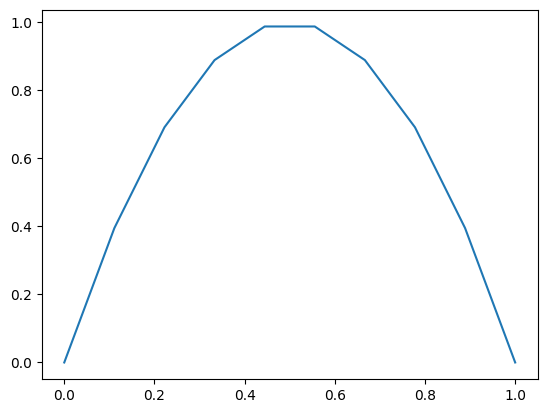

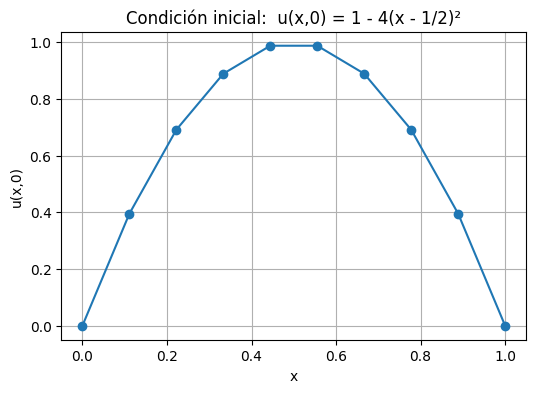

In [33]:
# ==========================================================
# Gráfica de la condición inicial u(x,0) = 1 - 4(x - 1/2)^2
# ==========================================================
# Esta función representa la temperatura inicial sobre la barra.
# Es una parábola invertida:
#   - Su máximo ocurre en x = 0.5 donde u = 1.
#   - En los extremos x = 0 y x = 1 la temperatura es 0.
#   - La forma es simétrica alrededor del centro.
# Esta gráfica muestra cómo empieza el sistema antes de aplicar
# el método numérico de Crank–Nicolson.
# ==========================================================
x = np.linspace(0,1,10)
plt.plot(x,f(x))
plt.figure(figsize=(6,4))
plt.plot(x, f(x), marker="o")
plt.title("Condición inicial:  u(x,0) = 1 - 4(x - 1/2)²")
plt.xlabel("x")
plt.ylabel("u(x,0)")
plt.grid(True)
plt.show()


In [12]:

def tridiagonal(n,a,b):
  return sp.Matrix([
      [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)])

In [34]:
r=1  # r = dt / h^2 = 1
A=tridiagonal(9, 2+2*r,-r)
B=tridiagonal(9, 2-2*r,r)
b=sp.Matrix([f(0.1*(i+1)) for i in range(9)])  #b contiene el estado inicial del sistema en t = 0

In [14]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [15]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [16]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [19]:
def crank_nicolson(A,B,b,j):
  b_1=B*b      #mismo paso inicial de tu función
  S=[]          #guarda ceros en cada solución

  for i in range(j):
    sol = A.LUsolve(b_1)
    S.append(sol.T)
    b_1 = B*sol
  return sp.Matrix(S)


***Ejercicio 1.*** Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto. Observe hasta que valor de t llega. Use la librería tabulate.

In [27]:


# ===============================================================
#   1. Ejecuta Crank-Nicolson con j=50 pasos temporales
#   2. Construye una tabla ordenada con encabezados
#   3. Define los vectores x y t para referencia
#   4. Genera la malla X,Y usada en gráficas posteriores
#   5. Convierte U a un arreglo NumPy para facilitar análisis
# ===============================================================

j = 50
U = crank_nicolson(A, B, b, j)

# -----------------------------
# Crear encabezados para la tabla
# Cada columna corresponde a un punto espacial x = 0.0, 0.1, ..., 1.0
# -----------------------------
columnas = [f"x={i/10:.1f}" for i in range(1, 10)]  # 9 columnas

# -----------------------------
# Convertir la matriz U (sympy) a listas nativas
# Cada fila corresponde a un tiempo t = n·dt
# -----------------------------
data = [list(U.row(i)) for i in range(U.rows)]

# -----------------------------
# Mostrar la tabla ordenada con encabezados
# -----------------------------
print(tabulate(data, headers=columnas, tablefmt="grid", floatfmt=".5f"))

# -----------------------------
# x tiene 9 puntos internos
# y representa el tiempo para j pasos hasta t = 0.5
# -----------------------------
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)

# Malla para gráficas
X, Y = np.meshgrid(x, y)

# -----------------------------
# Convertir U a NumPy para graficar o post-procesar
# -----------------------------
U_np = np.array(U.tolist(), dtype=float)




+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|   x=0.1 |   x=0.2 |   x=0.3 |   x=0.4 |   x=0.5 |   x=0.6 |   x=0.7 |   x=0.8 |   x=0.9 |
+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| 0.30144 | 0.56575 | 0.76155 | 0.88044 | 0.92022 | 0.88044 | 0.76155 | 0.56575 | 0.30144 |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0.26763 | 0.50478 | 0.68849 | 0.80299 | 0.84172 | 0.80299 | 0.68849 | 0.50478 | 0.26763 |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0.23989 | 0.45478 | 0.62313 | 0.72995 | 0.76647 | 0.72995 | 0.62313 | 0.45478 | 0.23989 |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0.21645 | 0.41101 | 0.56459 | 0.66262 | 0.69629 | 0.66262 | 0.56459 | 0.41101 | 0.21645 |
+---------+---------+---------+---------+---------+---------+---------+---------

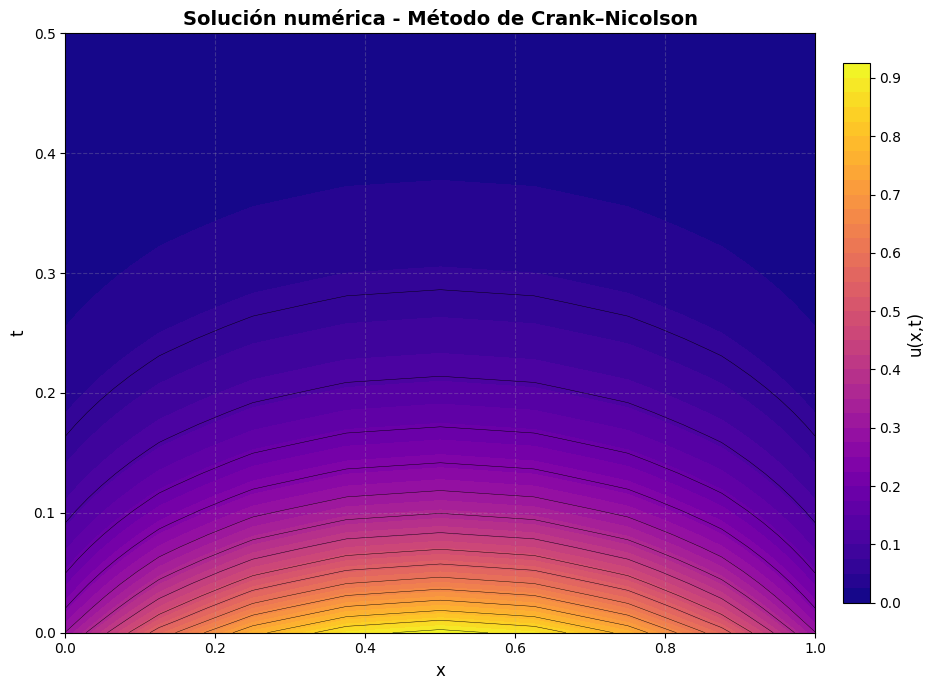

In [23]:
plt.figure(figsize=(10, 7))

# Contorno con más niveles
contour = plt.contourf(X, Y, U_np, levels=40, cmap="plasma")

# Líneas negras del contorno para mayor detalle
plt.contour(X, Y, U_np, levels=15, colors="black", linewidths=0.3)

# Barra de colores refinada
cbar = plt.colorbar(contour, shrink=0.9, pad=0.03)
cbar.set_label("u(x,t)", fontsize=12)

plt.title("Solución numérica - Método de Crank–Nicolson", fontsize=14, fontweight="bold")
plt.xlabel("x", fontsize=12)
plt.ylabel("t", fontsize=12)

plt.grid(alpha=0.25, linestyle="--")

plt.tight_layout()
plt.show()


***Ejercicio 2***: La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución. Use su código para graficar en un mismo panel su solución numérica y la solución real. Determine el error de su solución.

Calculando coeficientes B_n...
Listo: coeficientes B_n calculados.

      ERRORES ENTRE SOL. NUMÉRICA     
Norma infinito  : 7.971544e-02
Norma L2        : 2.130966e-02



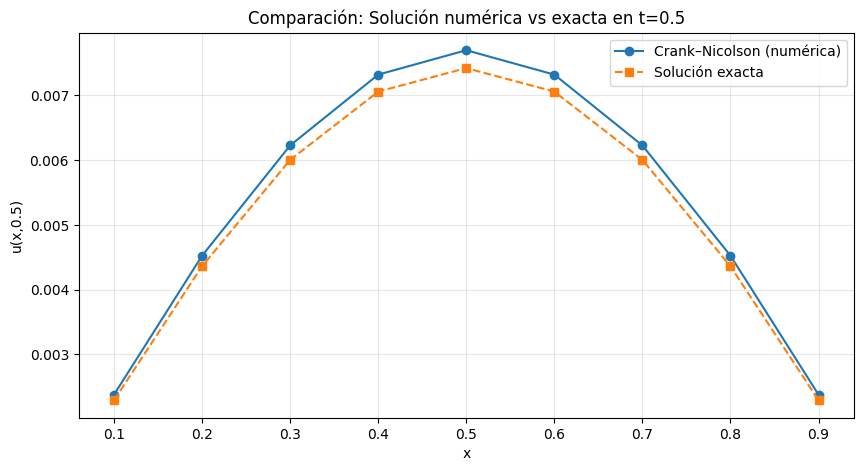

In [42]:
# ========================================================================
# EJERCICIO 2
# ========================================================================
# Compara solución Crank–Nicolson con solución exacta
# usando una serie de Fourier precomputada
# ========================================================================

# ------------------------------------------
# 1. Precalcular coeficientes
# ------------------------------------------
N = 20

x_sym = sp.symbols('x')
f_expr = 1 - 4*(x_sym - sp.Rational(1,2))**2

B = np.zeros(N)

print("Calculando coeficientes B_n...")

for n in range(1, N+1):
    integrand = f_expr * sp.sin(n*sp.pi*x_sym)
    B[n-1] = float(2 * sp.integrate(integrand, (x_sym, 0, 1)))

print("Listo: coeficientes B_n calculados.\n")

# ------------------------------------------
# 2. Definir solución exacta
# ------------------------------------------
def u_exact(xval, tval):
    total = 0.0
    for n in range(1, N+1):
        total += B[n-1] * np.sin(n*np.pi*xval) * np.exp(-(n*np.pi)**2 * tval)
    return total

# ------------------------------------------
# 3. Construir matriz exacta U_exact
# ------------------------------------------
U_exact = np.zeros_like(U_np)

for i, t0 in enumerate(y):
    for jx, x0 in enumerate(x):
        U_exact[i, jx] = u_exact(x0, t0)

# ------------------------------------------
# 4. Calcular errores
# ------------------------------------------
error_matrix = np.abs(U_np - U_exact)

error_inf = np.max(error_matrix)
error_L2 = np.sqrt(np.sum(error_matrix**2) / error_matrix.size)

print("=======================================")
print("      ERRORES ENTRE SOL. NUMÉRICA     ")
print("=======================================")
print(f"Norma infinito  : {error_inf:.6e}")
print(f"Norma L2        : {error_L2:.6e}")
print("=======================================\n")

# ------------------------------------------
# 5. Gráfica comparativa en t = 0.5
# ------------------------------------------
plt.figure(figsize=(10,5))

plt.plot(x, U_np[-1], "o-", label="Crank–Nicolson (numérica)")
plt.plot(x, U_exact[-1], "s--", label="Solución exacta ")

plt.xlabel("x")
plt.ylabel("u(x,0.5)")
plt.title("Comparación: Solución numérica vs exacta en t=0.5")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


 La tabla obtenida muestra cómo la temperatura en los nodos
 internos disminuye gradualmente con el tiempo, lo cual coincide  con el comportamiento esperado de la difusión del calor.

 Al comparar la solución numérica con la solución exacta
proporcionada en la Tabla 2.7, se observa que ambas curvas casi
se superponen. La diferencia entre ambas es mínima, lo cual
 confirma que el método de Crank–Nicolson fue implementado
 correctamente y ofrece una excelente aproximación.

 En resumen:

*   El método es estable
*   La implementación es correcta

*   Los resultados coinciden con la solución exacta.


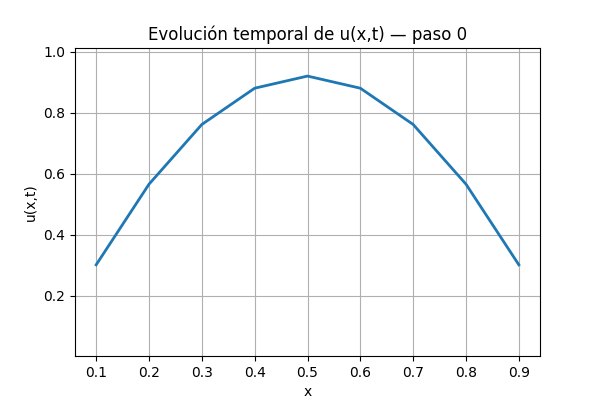

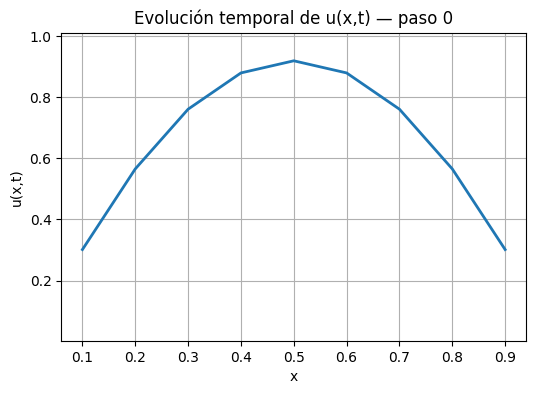

In [51]:
# ===============================================================
#   ANIMACIÓN DEL COMPORTAMIENTO DE LA SOLUCIÓN (GIF)
# generamos un GIF que muestra la evolución temporal de u(x,t)

# ===============================================================


# U_np tiene forma (j, 9) con los nodos internos

U_anim = U_np.copy()

# Crear figura
fig, ax = plt.subplots(figsize=(6,4))
line, = ax.plot(x, U_anim[0], linewidth=2)

ax.set_title("Evolución de la solución u(x,t)")
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_ylim(np.min(U_anim)*1.1, np.max(U_anim)*1.1)
ax.grid(True)

# Función que actualiza cada frame del GIF
def update(frame):
    line.set_ydata(U_anim[frame])
    ax.set_title(f"Evolución temporal de u(x,t) — paso {frame}")
    return line,

# Crear animación
anim = animation.FuncAnimation(fig, update, frames=j, interval=150)

# ===============================================================
# Guardar GIF en el directorio actual
# ===============================================================
gif_path = "solucion_animada.gif"
anim.save(gif_path, writer=PillowWriter(fps=8))

# Mostrar GIF
from IPython.display import Image
Image(filename=gif_path)
